In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Overview

In [5]:
df = pd.read_csv('credit_card_fraudulent.csv')
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,31-10-2022 17:39,1356.65,Azad Khanna,28eb8e72b9129e20bd08bc74a0c83e0d723f7c71f91011...,Gopal Group,6488,Bongaigaon,EUR,Visa,Jul-33,dcb5d6e69e4ded78464ae2843f509daf65c9ca09dfdc9b...,12,3fa573a8-c8c1-4073-8842-763cf5f5f24b,0,1,Online,157.176.73.139,Tablet,NaN,Voluptatum consectetur minus inventore perspic...
1995,13-05-2023 00:49,1428.99,Ojas Kaur,a32f3326ed561b9afeaf18963b4e96334528651fee3f1d...,"Anand, Arya and Khosla",8891,Korba,USD,Visa,Jun-29,5f193b350c8aba4883dedf97367ef3080821470661d0a2...,0,b29423ce-f873-4521-8526-02ae7ddfacb2,0,1,Online,209.110.34.44,Tablet,NaN,Enim id cumque adipisci molestiae fuga delectu...
1996,01-01-2023 13:49,1870.28,Inaaya Grover,46896064a3159b3aa4232602a4425dbd8157e76ae7d263...,Borra-Chokshi,7360,Etawah,EUR,MasterCard,Oct-30,023849c38925e2af028a2eb4e1dc41afd7dc7a238195c1...,5,c2c18de5-75d0-49de-b7ba-54e624458a75,1,2,In-Person,220.179.191.174,Tablet,vermamadhup,Ipsa ducimus corrupti voluptate. Amet fugit ma...
1997,25-07-2023 14:15,484.61,Kabir Swaminathan,e0bc55aeec2417f4bc87d3988486cbf50622c5d9f1dec4...,Kamdar-Handa,3802,Rampur,USD,Visa,Oct-29,02f99d2002c703f1669e358989f1663e1e38e96297dcb3...,5,d33a8e50-c72e-4495-b682-fa695dd57e30,1,2,In-Person,217.250.160.73,Desktop,NaN,Rem sapiente quod soluta.\nCumque a nulla nesc...


In [6]:
df.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [7]:
df.tail()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
1994,31-10-2022 17:39,1356.65,Azad Khanna,28eb8e72b9129e20bd08bc74a0c83e0d723f7c71f91011...,Gopal Group,6488,Bongaigaon,EUR,Visa,Jul-33,dcb5d6e69e4ded78464ae2843f509daf65c9ca09dfdc9b...,12,3fa573a8-c8c1-4073-8842-763cf5f5f24b,0,1,Online,157.176.73.139,Tablet,NaN,Voluptatum consectetur minus inventore perspic...
1995,13-05-2023 00:49,1428.99,Ojas Kaur,a32f3326ed561b9afeaf18963b4e96334528651fee3f1d...,"Anand, Arya and Khosla",8891,Korba,USD,Visa,Jun-29,5f193b350c8aba4883dedf97367ef3080821470661d0a2...,0,b29423ce-f873-4521-8526-02ae7ddfacb2,0,1,Online,209.110.34.44,Tablet,NaN,Enim id cumque adipisci molestiae fuga delectu...
1996,01-01-2023 13:49,1870.28,Inaaya Grover,46896064a3159b3aa4232602a4425dbd8157e76ae7d263...,Borra-Chokshi,7360,Etawah,EUR,MasterCard,Oct-30,023849c38925e2af028a2eb4e1dc41afd7dc7a238195c1...,5,c2c18de5-75d0-49de-b7ba-54e624458a75,1,2,In-Person,220.179.191.174,Tablet,vermamadhup,Ipsa ducimus corrupti voluptate. Amet fugit ma...
1997,25-07-2023 14:15,484.61,Kabir Swaminathan,e0bc55aeec2417f4bc87d3988486cbf50622c5d9f1dec4...,Kamdar-Handa,3802,Rampur,USD,Visa,Oct-29,02f99d2002c703f1669e358989f1663e1e38e96297dcb3...,5,d33a8e50-c72e-4495-b682-fa695dd57e30,1,2,In-Person,217.250.160.73,Desktop,NaN,Rem sapiente quod soluta.\nCumque a nulla nesc...
1998,04-01-2021 08:01,1784.63,Aradhya Ravi,a88e138214c4b424540efe47f170353531fcc4786cbfce...,Taneja Group,9721,Bhimavaram,EUR,American Express,Jan-24,4071e750b47271169c81824d8f47959be0b6f5ccd07800...,12,ee328cdf-734d-4bae-9795-208633a17085,1,1,In-Person,164.129.99.41,Mobile,nirvi74,Dicta impedit voluptatum minima numquam conseq...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                1999 non-null   object 
 1   Transaction Amount                       1999 non-null   float64
 2   Cardholder Name                          1999 non-null   object 
 3   Card Number (Hashed or Encrypted)        1999 non-null   object 
 4   Merchant Name                            1999 non-null   object 
 5   Merchant Category Code (MCC)             1999 non-null   int64  
 6   Transaction Location (City or ZIP Code)  1999 non-null   object 
 7   Transaction Currency                     1999 non-null   object 
 8   Card Type                                1999 non-null   object 
 9   Card Expiration Date                     1999 non-null   object 
 10  CVV Code (Hashed or Encrypted)           1999 no

In [9]:
df.isna().sum()

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud Flag or Label                           0
Previous Transactions                         0
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   1011
Transaction Notes                             0
dtype: int64

In [10]:
df=df.fillna(method="bfill")
df.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
User Account Information                   0
Transaction Notes                          0
dtype: int64

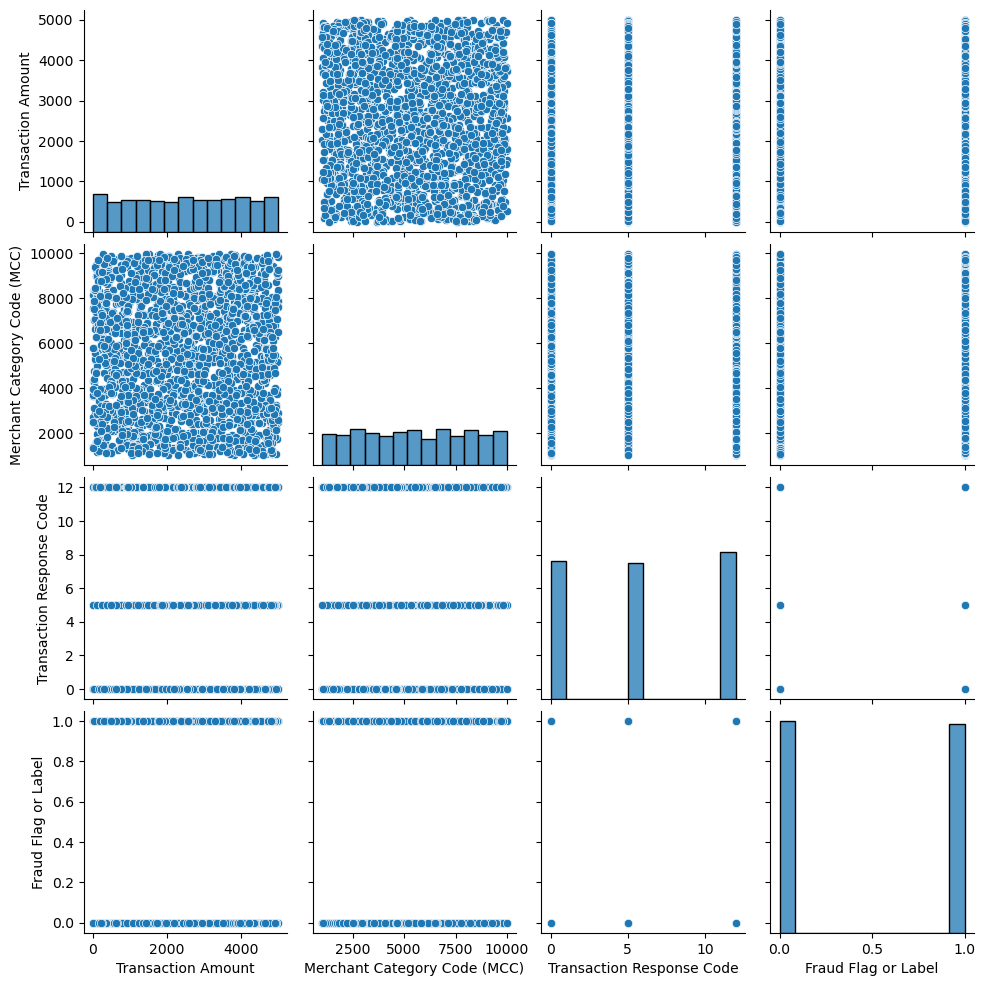

In [11]:
sns.pairplot(df)

# Class Distribution

In [12]:
cd = df["Fraud Flag or Label"].value_counts()
print(cd)

0    1005
1     994
Name: Fraud Flag or Label, dtype: int64


In [13]:
imbalance_ratio = cd[1] / cd[0]
print("Imbalance Ratio (Fraudulent to Non-Fraudulent):", imbalance_ratio)

Imbalance Ratio (Fraudulent to Non-Fraudulent): 0.9890547263681592


# Basic logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
x = df[['Transaction Amount','Transaction Currency', 'Card Type', 'Transaction Source', 'Device Information']]
x.head()

,Transaction Amount,Transaction Currency,Card Type,Transaction Source,Device Information
0,285.88,INR,MasterCard,Online,Tablet
1,1777.32,EUR,American Express,Online,Mobile
2,3939.01,USD,Visa,In-Person,Mobile
3,376.44,USD,Visa,In-Person,Tablet
4,1687.33,INR,MasterCard,Online,Desktop


In [16]:
y = df[['Fraud Flag or Label']]
y.head()

,Fraud Flag or Label
0,1
1,1
2,1
3,0
4,1


In [17]:
from sklearn.preprocessing import LabelEncoder

# Columns to be label encoded
le = ['Transaction Currency', 'Card Type', 'Transaction Source', 'Device Information']

# Initialize LabelEncoders for each column
label_encoders = {}
for column in le:
    label_encoders[column] = LabelEncoder()
    x[column] = label_encoders[column].fit_transform(x[column])

# Display the first few rows of the modified DataFrame
x


C:\Users\Charanteja\AppData\Local\Temp\ipykernel_13052\1407624524.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = label_encoders[column].fit_transform(x[column])


,Transaction Amount,Transaction Currency,Card Type,Transaction Source,Device Information
0,285.88,1,1,1,2
1,1777.32,0,0,1,1
2,3939.01,2,2,0,1
3,376.44,2,2,0,2
4,1687.33,1,1,1,0
...,...,...,...,...,...
1994,1356.65,0,2,1,2
1995,1428.99,2,2,1,2
1996,1870.28,0,1,0,2
1997,484.61,2,2,0,0


In [18]:
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

print('********Training Data Shape**********\n')

print('Training data-X- Shape:\t',xtrain.shape)

print()

print('Training data-y- Shape:\t',ytrain.shape)

print()

print('********Testing Data Shape**********\n')

print('Testing data (x-Input) Shape:\t',xtest.shape)

print()

print('Testing data (y-Outcome) Shape:\t',ytest.shape)

********Training Data Shape**********

Training data-X- Shape:	 (1599, 5)

Training data-y- Shape:	 (1599, 1)

********Testing Data Shape**********

Testing data (x-Input) Shape:	 (400, 5)

Testing data (y-Outcome) Shape:	 (400, 1)


In [19]:

log_reg=LogisticRegression (solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')

log_reg.fit(xtrain, ytrain)

#Test the model

ypred=log_reg.predict(xtest)

print('Predicted Label for the input samples: \n',ypred)

print()

print('Testing is completed\n')
print("testing samples are: \t",len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0]

Testing is completed

testing samples are: 	 400


C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Metrics

In [20]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

Accuracy:  0.52
Precision:  0.49074074074074076
Recall:  0.5638297872340425
F1 Score:  0.5247524752475248


In [21]:
log_reg.classes_

array([0, 1], dtype=int64)

In [22]:
log_reg.coef_

array([[-2.34930826e-05,  9.21904378e-03,  1.48028112e-01,
         5.62825343e-02, -1.10753863e-01]])

In [23]:
log_reg.intercept_

array([-0.00225297])

In [24]:
log_reg.fit_intercept

True

In [25]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [26]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.47172905, 0.46978976, 0.52157147, 0.4408356 , 0.54990631,
       0.51993545, 0.52193722, 0.46377703, 0.55439429, 0.51907962,
       0.52225221, 0.49611333, 0.5161816 , 0.47390913, 0.46747207,
       0.52634137, 0.52740904, 0.51202877, 0.5248953 , 0.50066692,
       0.55978919, 0.49795956, 0.57330562, 0.55615852, 0.49758816,
       0.54372998, 0.51247161, 0.53493007, 0.53134463, 0.50791572,
       0.58115586, 0.48493753, 0.52342757, 0.54945365, 0.47704132,
       0.52664022, 0.52291814, 0.53444299, 0.51516238, 0.50180764,
       0.52967719, 0.52509991, 0.45660119, 0.53336911, 0.46720937,
       0.51328783, 0.44698785, 0.5690046 , 0.41795388, 0.47749738,
       0.55665836, 0.42256504, 0.51402255, 0.49191548, 0.58765841,
       0.53583013, 0.42546371, 0.47818602, 0.4722615 , 0.46368255,
       0.49591732, 0.47862637, 0.48876556, 0.46059044, 0.46124279,
       0.49383864, 0.51166174, 0.51756904, 0.51526384, 0.55419569,
       0.45999652, 0.52564981, 0.42863495, 0.50404537, 0.46927

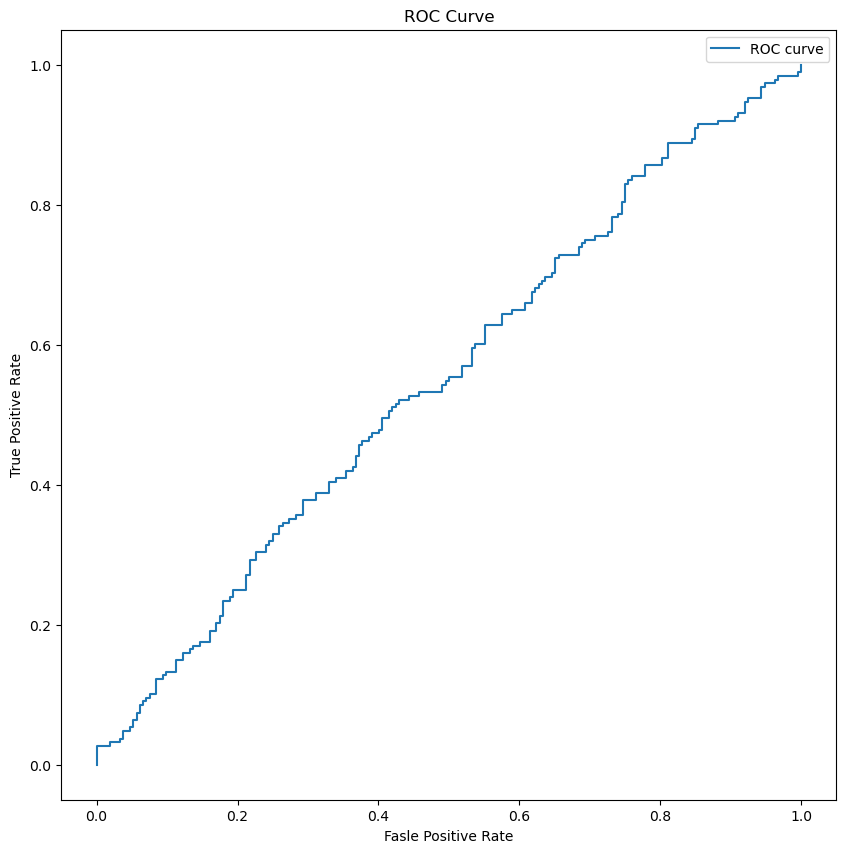

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc



fpr,tpr,thresholds = roc_curve (ytest,y_probs)

roc_curve = auc(fpr,tpr)



plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, label='ROC curve')

plt.xlabel('Fasle Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

In [28]:
roc_curve

0.5488257727820152

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x = sc.fit_transform(x)

In [30]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[-1.71242183,  1.23720213, -1.2606348 ,  1.01068877, -1.22465422],
       [-1.6048302 , -1.2622119 ,  1.18270465, -0.98942428, -1.22465422],
       [-0.97851952, -1.2622119 ,  1.18270465, -0.98942428,  1.19141253],
       ...,
       [ 1.28133435, -1.2622119 , -1.2606348 , -0.98942428, -0.01662085],
       [-1.41771106, -0.01250489,  1.18270465, -0.98942428, -1.22465422],
       [-1.04821948, -0.01250489,  1.18270465,  1.01068877,  1.19141253]])

In [31]:
sc_test_x=sc.transform(xtest)
sc_test_x

array([[-1.4398009 , -0.01250489, -1.2606348 , -0.98942428, -0.01662085],
       [ 0.42002162, -0.01250489, -1.2606348 ,  1.01068877, -0.01662085],
       [-1.56905271, -1.2622119 , -0.03896508,  1.01068877, -0.01662085],
       ...,
       [ 0.01151306, -0.01250489, -0.03896508,  1.01068877, -1.22465422],
       [ 0.08274069, -0.01250489, -0.03896508, -0.98942428, -1.22465422],
       [ 0.84560053,  1.23720213, -1.2606348 ,  1.01068877,  1.19141253]])

In [32]:
log_reg_sc=LogisticRegression(solver='liblinear',verbose=2)
print('*******Logistic Regression*******')
#train the model
print("Training Started.......\n")
print()
log_reg_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

*******Logistic Regression*******
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0]

Testing is also completed....

Testing

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Metrics

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



print('******Performance Measures for Logistic Regression****')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

******Performance Measures for Logistic Regression****
Accuracy Score:	 0.52

Confusion Matrix:
 [[102 110]
 [ 82 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.52       212
           1       0.49      0.56      0.52       188

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400


Precision Score:	 0.49074074074074076

Recall Score:	 0.5638297872340425

F1 Score:	 0.5247524752475248


# Over Sampling

In [34]:
from imblearn import over_sampling,under_sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
os_train_x,os_train_y = ros.fit_resample(sc_train_x,ytrain)
print(os_train_x,os_train_y)                                          

[[-1.71242183  1.23720213 -1.2606348   1.01068877 -1.22465422]
 [-1.6048302  -1.2622119   1.18270465 -0.98942428 -1.22465422]
 [-0.97851952 -1.2622119   1.18270465 -0.98942428  1.19141253]
 ...
 [-1.27220048  1.23720213 -1.2606348  -0.98942428  1.19141253]
 [ 1.33073812 -0.01250489  1.18270465 -0.98942428 -1.22465422]
 [ 0.7882447  -1.2622119   1.18270465  1.01068877  1.19141253]]       Fraud Flag or Label
0                       0
1                       0
2                       1
3                       0
4                       1
...                   ...
1607                    0
1608                    0
1609                    0
1610                    0
1611                    0

[1612 rows x 1 columns]


# Build log reg model with Oversampling data

In [36]:
log_reg_os=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_os.fit(os_train_x,os_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_os=log_reg_os.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_os)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_os))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_os))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_os))
print()
print('Classification Report:\n',classification_report(ytest,ypred_os))
print()
print('Precision Score:\t',precision_score(ytest,ypred_os))
print()
print('Recall Score:\t',recall_score(ytest,ypred_os))
print()
print('F1 Score:\t',f1_score(ytest,ypred_os))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.5275

Confusion Matrix:
 [[111 101]
 [ 88 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       212
           1       0.50      0.53      0.51       188

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400


Precision Score:	 0.4975124378109453

Recall Score:	 0.5319148936170213

F1 Score:	 0.5141388174807199


# Using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
sm_train_x, sm_train_y = smote.fit_resample(sc_train_x, ytrain)
sm_train_x,sm_train_y

(array([[-1.71242183,  1.23720213, -1.2606348 ,  1.01068877, -1.22465422],
        [-1.6048302 , -1.2622119 ,  1.18270465, -0.98942428, -1.22465422],
        [-0.97851952, -1.2622119 ,  1.18270465, -0.98942428,  1.19141253],
        ...,
        [ 1.12937196,  1.23720213, -0.03896508,  1.01068877, -0.01662085],
        [ 1.12290947,  1.23720213, -1.2606348 ,  1.01068877,  1.19141253],
        [ 1.38319107, -1.2622119 ,  1.18270465,  1.01068877,  1.19141253]]),
       Fraud Flag or Label
 0                       0
 1                       0
 2                       1
 3                       0
 4                       1
 ...                   ...
 1607                    0
 1608                    0
 1609                    0
 1610                    0
 1611                    0
 
 [1612 rows x 1 columns])

In [39]:
log_reg_sm=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sm.fit(sm_train_x,sm_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_sm=log_reg_os.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sm)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_sm))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sm))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sm))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sm))
print()
print('Precision Score:\t',precision_score(ytest,ypred_sm))
print()
print('Recall Score:\t',recall_score(ytest,ypred_sm))
print()
print('F1 Score:\t',f1_score(ytest,ypred_sm))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.5275

Confusion Matrix:
 [[111 101]
 [ 88 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       212
           1       0.50      0.53      0.51       188

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400


Precision Score:	 0.4975124378109453

Recall Score:	 0.5319148936170213

F1 Score:	 0.5141388174807199


# Under Sampling

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
us_train_x,us_train_y = rus.fit_resample(sc_train_x,ytrain)
print(us_train_x,us_train_y)   

[[-1.71242183  1.23720213 -1.2606348   1.01068877 -1.22465422]
 [-1.6048302  -1.2622119   1.18270465 -0.98942428 -1.22465422]
 [ 1.40344567 -1.2622119  -1.2606348  -0.98942428 -1.22465422]
 ...
 [ 1.01134593  1.23720213 -0.03896508  1.01068877  1.19141253]
 [ 0.44012685 -0.01250489  1.18270465 -0.98942428 -0.01662085]
 [ 0.0188036  -1.2622119  -0.03896508  1.01068877 -1.22465422]]       Fraud Flag or Label
0                       0
1                       0
2                       0
3                       0
4                       0
...                   ...
1581                    1
1582                    1
1583                    1
1584                    1
1585                    1

[1586 rows x 1 columns]


# Build log reg model with Undersampling data

In [42]:
log_reg_us=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_us.fit(us_train_x,us_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_us=log_reg_us.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_us)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_us))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_us))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_us))
print()
print('Classification Report:\n',classification_report(ytest,ypred_us))
print()
print('Precision Score:\t',precision_score(ytest,ypred_us))
print()
print('Recall Score:\t',recall_score(ytest,ypred_us))
print()
print('F1 Score:\t',f1_score(ytest,ypred_us))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.525

Confusion Matrix:
 [[108 104]
 [ 86 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53       212
           1       0.50      0.54      0.52       188

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.53      0.53      0.53       400


Precision Score:	 0.49514563106796117

Recall Score:	 0.5425531914893617

F1 Score:	 0.5177664974619288
